In [94]:
# import modules
import pandas as pd
import numpy as np
import seaborn as sns# graph plotting
import matplotlib.pyplot as plt #for 2d graph plotting
from sklearn.model_selection import train_test_split# splitting the data into train and test
from sklearn.ensemble import RandomForestRegressor #training the model
from sklearn.metrics import mean_squared_error, r2_score #securing errors
from mpl_toolkits.mplot3d import Axes3D #for 3d plotting
from sklearn.model_selection import GridSearchCV #model tuning


In [73]:
# reading the file
dataset = pd.read_excel("Data Science - Intern - Data Set.xlsx")


In [74]:
#finding null values in each column
dataset.isnull().sum()

,0
uniqueid,0
ts,0
lat,0
lng,0
external_bat_voltage,18434
...,...
boost_pressure,18434
intake_manifold_1_temperature,18434
air_inlet_pressure,18434
exhaust_gas_temperature,18434


In [75]:
#finding columns with max null values
thresh_value = len(dataset) - 2000
#dropping those columns
df=dataset.dropna(axis=1,thresh=thresh_value)
df

,uniqueid,ts,lat,lng,engineload,coolant,engineoiltemp,vehiclespeed,rpm,obddistance,...,can_raw_data,engine_throttle_valve1_pos,engine_throttle_valve2_pos,enginefueltemp,drivers_demand_engine_torque_percent,engine_torque_mode,accelerator_pedal_pos_2,brake_switch_status,clutch_switch_status,parking_switch_status
0,it_220403501,1709340731,19.069340,78.355148,28,33,1774.9688,0.00000,749.000,60780800,...,"0CF00300:D1001CFFFF4C4886,0CF00400:407D9268170...",100.0,102,215,0,1,102,Released,Released,Pressed
1,it_220403501,1709340794,19.069347,78.355141,22,41,1774.9688,0.00000,1208.375,60780800,...,"0CF00300:D03B16FFFF4C4283,0CF00400:41908FC3250...",99.6,102,215,19,2,102,Released,Pressed,Pressed
2,it_220403501,1709340857,19.069414,78.355179,25,48,1774.9688,1.40625,752.625,60780800,...,"0CF00300:D10019FFFF4C4983,0CF00400:307D8F85170...",99.6,102,215,0,1,102,Pressed,Pressed,Released
3,it_220403501,1709340920,19.069258,78.355225,35,52,1774.9688,2.81250,996.375,60780820,...,"0CF00300:D05423FFFF4C4C82,0CF00400:519998231F0...",99.6,102,215,28,2,102,Released,Pressed,Released
4,it_220403501,1709340983,19.069094,78.355339,0,57,1774.9688,4.53125,1065.750,60780840,...,"0CF00300:D10800FFFF4C3284,0CF00400:017E7E4E210...",100.0,102,215,1,2,102,Released,Pressed,Released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18429,it_220403501,1713635865,18.869371,79.020393,50,89,1774.9688,14.28125,945.125,71872976,...,"0CF00300:D07432FFFF0C847E,0CF00400:719F9E891D0...",100.0,102,215,34,2,102,Released,Pressed,Released
18430,it_220403501,1713635929,18.867130,79.018272,0,92,1774.9688,38.28125,1130.750,71873344,...,"0CF00300:D10000FFFF0C307E,0CF00400:017D7D56230...",100.0,102,215,0,2,102,Released,Pressed,Released
18431,it_220403501,1713635993,18.862076,79.013924,10,87,1774.9688,32.34375,749.750,71874064,...,"0CF00300:D1000AFFFF0C447D,0CF00400:007D846E170...",100.0,102,215,0,1,102,Released,Pressed,Released
18432,it_220403501,1713636056,18.859493,79.011673,52,87,1774.9688,17.71875,820.625,71874464,...,"0CF00300:D08D34FFFF0D707E,0CF00400:38ABA4A5190...",100.0,102,215,46,9,102,Released,Pressed,Released


In [76]:
#finding columns with all values similar
columns_drop = [col for col in df.columns if df[col].nunique() == 1]
columns_drop

['uniqueid',
 'engineoiltemp',
 'selected_gear',
 'vibration_status',
 'engine_throttle_valve2_pos',
 'enginefueltemp',
 'accelerator_pedal_pos_2']

In [77]:
#dropping those columns
df1=df.drop(columns=columns_drop)
df1

,ts,lat,lng,engineload,coolant,vehiclespeed,rpm,obddistance,runtime,engine_torque_percent,...,fuel_economy,accelerator_pedal_pos,pluscode,can_raw_data,engine_throttle_valve1_pos,drivers_demand_engine_torque_percent,engine_torque_mode,brake_switch_status,clutch_switch_status,parking_switch_status
0,1709340731,19.069340,78.355148,28,33,0.00000,749.000,60780800,1970.85,21,...,0.000000,0.0,7JFW3994+,"0CF00300:D1001CFFFF4C4886,0CF00400:407D9268170...",100.0,0,1,Released,Released,Pressed
1,1709340794,19.069347,78.355141,22,41,0.00000,1208.375,60780800,1970.85,18,...,0.000000,23.6,7JFW3994+,"0CF00300:D03B16FFFF4C4283,0CF00400:41908FC3250...",99.6,19,2,Released,Pressed,Pressed
2,1709340857,19.069414,78.355179,25,48,1.40625,752.625,60780800,1970.85,18,...,0.337891,0.0,7JFW3994+,"0CF00300:D10019FFFF4C4983,0CF00400:307D8F85170...",99.6,0,1,Pressed,Pressed,Released
3,1709340920,19.069258,78.355225,35,52,2.81250,996.375,60780820,1970.90,27,...,0.121094,33.6,7JFW3994+,"0CF00300:D05423FFFF4C4C82,0CF00400:519998231F0...",99.6,28,2,Released,Pressed,Released
4,1709340983,19.069094,78.355339,0,57,4.53125,1065.750,60780840,1970.90,1,...,125.500000,3.2,7JFW3994+,"0CF00300:D10800FFFF4C3284,0CF00400:017E7E4E210...",100.0,1,2,Released,Pressed,Released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18429,1713635865,18.869371,79.020393,50,89,14.28125,945.125,71872976,2287.00,33,...,1.705078,46.4,7JCXV29C+,"0CF00300:D07432FFFF0C847E,0CF00400:719F9E891D0...",100.0,34,2,Released,Pressed,Released
18430,1713635929,18.867130,79.018272,0,92,38.28125,1130.750,71873344,2287.05,0,...,125.500000,0.0,7JCXV289+,"0CF00300:D10000FFFF0C307E,0CF00400:017D7D56230...",100.0,0,2,Released,Pressed,Released
18431,1713635993,18.862076,79.013924,10,87,32.34375,749.750,71874064,2287.05,7,...,17.273438,0.0,7JCXV267+,"0CF00300:D1000AFFFF0C447D,0CF00400:007D846E170...",100.0,0,1,Released,Pressed,Released
18432,1713636056,18.859493,79.011673,52,87,17.71875,820.625,71874464,2287.05,39,...,1.929688,56.4,7JCXV256+,"0CF00300:D08D34FFFF0D707E,0CF00400:38ABA4A5190...",100.0,46,9,Released,Pressed,Released


In [78]:
#dropping columns whose contribution is not much significant
df2=df1.drop(["runtime","obddistance","engine_throttle_valve1_pos","can_raw_data","pluscode"], axis=1)
df2

,ts,lat,lng,engineload,coolant,vehiclespeed,rpm,engine_torque_percent,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,drivers_demand_engine_torque_percent,engine_torque_mode,brake_switch_status,clutch_switch_status,parking_switch_status
0,1709340731,19.069340,78.355148,28,33,0.00000,749.000,21,0,17935.5,23.6,86.14,5.30,0.000000,0.0,0,1,Released,Released,Pressed
1,1709340794,19.069347,78.355141,22,41,0.00000,1208.375,18,0,17935.5,23.6,86.14,6.45,0.000000,23.6,19,2,Released,Pressed,Pressed
2,1709340857,19.069414,78.355179,25,48,1.40625,752.625,18,129,17936.0,22.8,83.22,4.70,0.337891,0.0,0,1,Pressed,Pressed,Released
3,1709340920,19.069258,78.355225,35,52,2.81250,996.375,27,129,17936.0,20.4,74.46,8.60,0.121094,33.6,28,2,Released,Pressed,Released
4,1709340983,19.069094,78.355339,0,57,4.53125,1065.750,1,3,17936.0,23.2,84.68,0.00,125.500000,3.2,1,2,Released,Pressed,Released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18429,1713635865,18.869371,79.020393,50,89,14.28125,945.125,33,11,21058.5,78.8,287.62,8.50,1.705078,46.4,34,2,Released,Pressed,Released
18430,1713635929,18.867130,79.018272,0,92,38.28125,1130.750,0,16,21058.5,80.8,294.92,0.00,125.500000,0.0,0,2,Released,Pressed,Released
18431,1713635993,18.862076,79.013924,10,87,32.34375,749.750,7,0,21059.0,80.4,293.46,1.85,17.273438,0.0,0,1,Released,Pressed,Released
18432,1713636056,18.859493,79.011673,52,87,17.71875,820.625,39,13,21059.0,79.2,289.08,9.30,1.929688,56.4,46,9,Released,Pressed,Released


In [79]:
#dropping columns which provide traffic information but cannot be accessed more due to unavailability of google maps api
df3=df2.drop(["lat","lng","ts",], axis=1)
df3

,engineload,coolant,vehiclespeed,rpm,engine_torque_percent,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,drivers_demand_engine_torque_percent,engine_torque_mode,brake_switch_status,clutch_switch_status,parking_switch_status
0,28,33,0.00000,749.000,21,0,17935.5,23.6,86.14,5.30,0.000000,0.0,0,1,Released,Released,Pressed
1,22,41,0.00000,1208.375,18,0,17935.5,23.6,86.14,6.45,0.000000,23.6,19,2,Released,Pressed,Pressed
2,25,48,1.40625,752.625,18,129,17936.0,22.8,83.22,4.70,0.337891,0.0,0,1,Pressed,Pressed,Released
3,35,52,2.81250,996.375,27,129,17936.0,20.4,74.46,8.60,0.121094,33.6,28,2,Released,Pressed,Released
4,0,57,4.53125,1065.750,1,3,17936.0,23.2,84.68,0.00,125.500000,3.2,1,2,Released,Pressed,Released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18429,50,89,14.28125,945.125,33,11,21058.5,78.8,287.62,8.50,1.705078,46.4,34,2,Released,Pressed,Released
18430,0,92,38.28125,1130.750,0,16,21058.5,80.8,294.92,0.00,125.500000,0.0,0,2,Released,Pressed,Released
18431,10,87,32.34375,749.750,7,0,21059.0,80.4,293.46,1.85,17.273438,0.0,0,1,Released,Pressed,Released
18432,52,87,17.71875,820.625,39,13,21059.0,79.2,289.08,9.30,1.929688,56.4,46,9,Released,Pressed,Released


In [80]:
#dropping rows with null values
df4 = df3.dropna()
df4

,engineload,coolant,vehiclespeed,rpm,engine_torque_percent,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,drivers_demand_engine_torque_percent,engine_torque_mode,brake_switch_status,clutch_switch_status,parking_switch_status
0,28,33,0.00000,749.000,21,0,17935.5,23.6,86.14,5.30,0.000000,0.0,0,1,Released,Released,Pressed
1,22,41,0.00000,1208.375,18,0,17935.5,23.6,86.14,6.45,0.000000,23.6,19,2,Released,Pressed,Pressed
2,25,48,1.40625,752.625,18,129,17936.0,22.8,83.22,4.70,0.337891,0.0,0,1,Pressed,Pressed,Released
3,35,52,2.81250,996.375,27,129,17936.0,20.4,74.46,8.60,0.121094,33.6,28,2,Released,Pressed,Released
4,0,57,4.53125,1065.750,1,3,17936.0,23.2,84.68,0.00,125.500000,3.2,1,2,Released,Pressed,Released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18429,50,89,14.28125,945.125,33,11,21058.5,78.8,287.62,8.50,1.705078,46.4,34,2,Released,Pressed,Released
18430,0,92,38.28125,1130.750,0,16,21058.5,80.8,294.92,0.00,125.500000,0.0,0,2,Released,Pressed,Released
18431,10,87,32.34375,749.750,7,0,21059.0,80.4,293.46,1.85,17.273438,0.0,0,1,Released,Pressed,Released
18432,52,87,17.71875,820.625,39,13,21059.0,79.2,289.08,9.30,1.929688,56.4,46,9,Released,Pressed,Released


In [81]:
#dropping rows with gear count very insignificant
df5 = df4[df4['current_gear'] <= 30]
df5

,engineload,coolant,vehiclespeed,rpm,engine_torque_percent,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,drivers_demand_engine_torque_percent,engine_torque_mode,brake_switch_status,clutch_switch_status,parking_switch_status
0,28,33,0.00000,749.000,21,0,17935.5,23.6,86.14,5.30,0.000000,0.0,0,1,Released,Released,Pressed
1,22,41,0.00000,1208.375,18,0,17935.5,23.6,86.14,6.45,0.000000,23.6,19,2,Released,Pressed,Pressed
4,0,57,4.53125,1065.750,1,3,17936.0,23.2,84.68,0.00,125.500000,3.2,1,2,Released,Pressed,Released
6,0,53,0.00000,0.000,0,0,17936.0,23.2,84.68,0.00,125.500000,0.0,0,15,Released,Released,Pressed
7,0,53,0.00000,0.000,0,0,17936.0,23.2,84.68,0.00,125.500000,0.0,0,15,Released,Pressed,Pressed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18429,50,89,14.28125,945.125,33,11,21058.5,78.8,287.62,8.50,1.705078,46.4,34,2,Released,Pressed,Released
18430,0,92,38.28125,1130.750,0,16,21058.5,80.8,294.92,0.00,125.500000,0.0,0,2,Released,Pressed,Released
18431,10,87,32.34375,749.750,7,0,21059.0,80.4,293.46,1.85,17.273438,0.0,0,1,Released,Pressed,Released
18432,52,87,17.71875,820.625,39,13,21059.0,79.2,289.08,9.30,1.929688,56.4,46,9,Released,Pressed,Released


In [82]:

# Filter rows where 'accelerator_pedal_pos' is more and either 'vehiclespeed' or 'fuel_rate' is 0
cond3 = df5[(df5['accelerator_pedal_pos'] > 0) & ((df5['vehiclespeed'] == 0) | (df5['fuel_rate'] == 0))]


df6 = df5.drop(cond3.index)

df6

,engineload,coolant,vehiclespeed,rpm,engine_torque_percent,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,drivers_demand_engine_torque_percent,engine_torque_mode,brake_switch_status,clutch_switch_status,parking_switch_status
0,28,33,0.00000,749.000,21,0,17935.5,23.6,86.14,5.30,0.000000,0.0,0,1,Released,Released,Pressed
6,0,53,0.00000,0.000,0,0,17936.0,23.2,84.68,0.00,125.500000,0.0,0,15,Released,Released,Pressed
7,0,53,0.00000,0.000,0,0,17936.0,23.2,84.68,0.00,125.500000,0.0,0,15,Released,Pressed,Pressed
8,0,53,0.00000,0.000,0,0,17936.0,23.2,84.68,0.00,125.500000,0.0,0,15,Released,Released,Pressed
9,0,52,0.00000,0.000,0,0,17936.0,23.2,84.68,0.00,125.500000,0.0,0,15,Released,Released,Pressed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18429,50,89,14.28125,945.125,33,11,21058.5,78.8,287.62,8.50,1.705078,46.4,34,2,Released,Pressed,Released
18430,0,92,38.28125,1130.750,0,16,21058.5,80.8,294.92,0.00,125.500000,0.0,0,2,Released,Pressed,Released
18431,10,87,32.34375,749.750,7,0,21059.0,80.4,293.46,1.85,17.273438,0.0,0,1,Released,Pressed,Released
18432,52,87,17.71875,820.625,39,13,21059.0,79.2,289.08,9.30,1.929688,56.4,46,9,Released,Pressed,Released


In [84]:
# defining condition where current is 0
cond2 = (df6['current_gear'] == 0)
# Apply the condition to identify rows to be checked further
check2 = df6[cond2]

# Further condition: check if vehiclespeed > 0
drop2 = check2[check2['vehiclespeed'] > 0]

# Drop rows that satisfy both conditions
df7 = df6[~df6.index.isin(drop2.index)]
df7


,engineload,coolant,vehiclespeed,rpm,engine_torque_percent,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,drivers_demand_engine_torque_percent,engine_torque_mode,brake_switch_status,clutch_switch_status,parking_switch_status
0,28,33,0.00000,749.000,21,0,17935.5,23.6,86.14,5.30,0.000000,0.0,0,1,Released,Released,Pressed
6,0,53,0.00000,0.000,0,0,17936.0,23.2,84.68,0.00,125.500000,0.0,0,15,Released,Released,Pressed
7,0,53,0.00000,0.000,0,0,17936.0,23.2,84.68,0.00,125.500000,0.0,0,15,Released,Pressed,Pressed
8,0,53,0.00000,0.000,0,0,17936.0,23.2,84.68,0.00,125.500000,0.0,0,15,Released,Released,Pressed
9,0,52,0.00000,0.000,0,0,17936.0,23.2,84.68,0.00,125.500000,0.0,0,15,Released,Released,Pressed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18428,0,92,28.37500,1361.250,0,13,21058.5,80.0,292.00,0.00,125.500000,0.0,0,2,Released,Pressed,Released
18429,50,89,14.28125,945.125,33,11,21058.5,78.8,287.62,8.50,1.705078,46.4,34,2,Released,Pressed,Released
18430,0,92,38.28125,1130.750,0,16,21058.5,80.8,294.92,0.00,125.500000,0.0,0,2,Released,Pressed,Released
18432,52,87,17.71875,820.625,39,13,21059.0,79.2,289.08,9.30,1.929688,56.4,46,9,Released,Pressed,Released


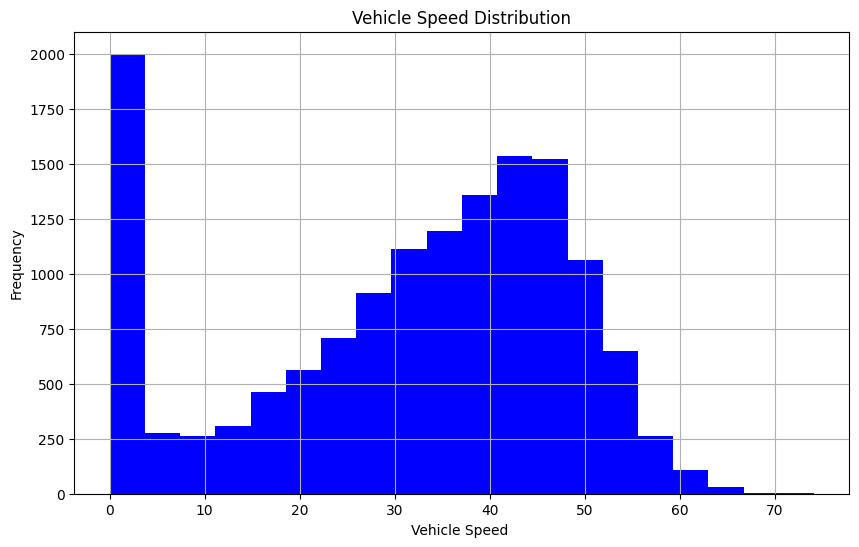

In [85]:
# Plotting histogram for vehicle speed
plt.figure(figsize=(10, 6))
df7['vehiclespeed'].hist(bins=20, color='blue')
plt.title('Vehicle Speed Distribution')
plt.xlabel('Vehicle Speed ')
plt.ylabel('Frequency')
plt.show()

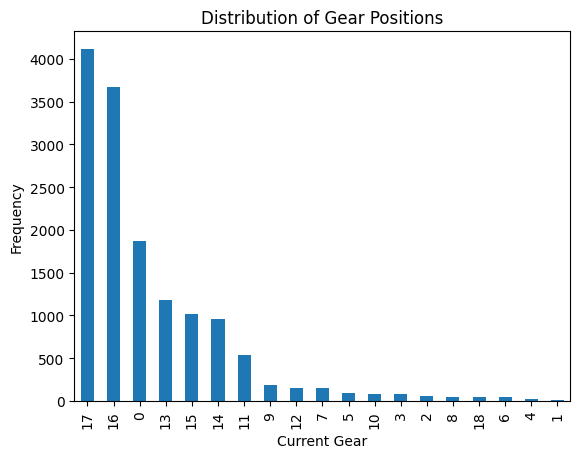

In [86]:
# Plot the distribution of gear positions
df7['current_gear'].value_counts().plot(kind='bar')
plt.xlabel('Current Gear')
plt.ylabel('Frequency')
plt.title('Distribution of Gear Positions')
plt.show()

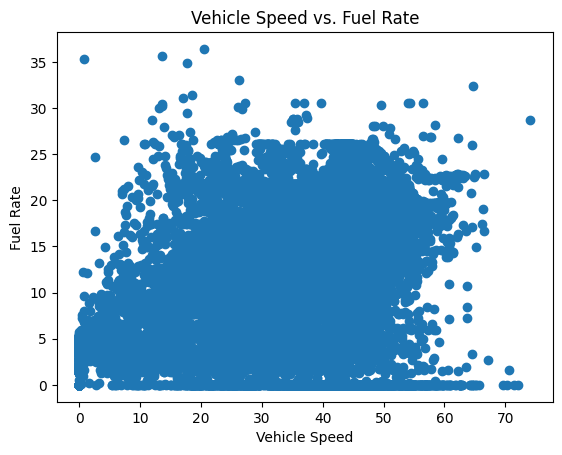

In [87]:
#Scatter Plot speed vs fuel rate
plt.scatter(df7['vehiclespeed'], df7['fuel_rate'])
plt.xlabel('Vehicle Speed')
plt.ylabel('Fuel Rate')
plt.title('Vehicle Speed vs. Fuel Rate')
plt.show()

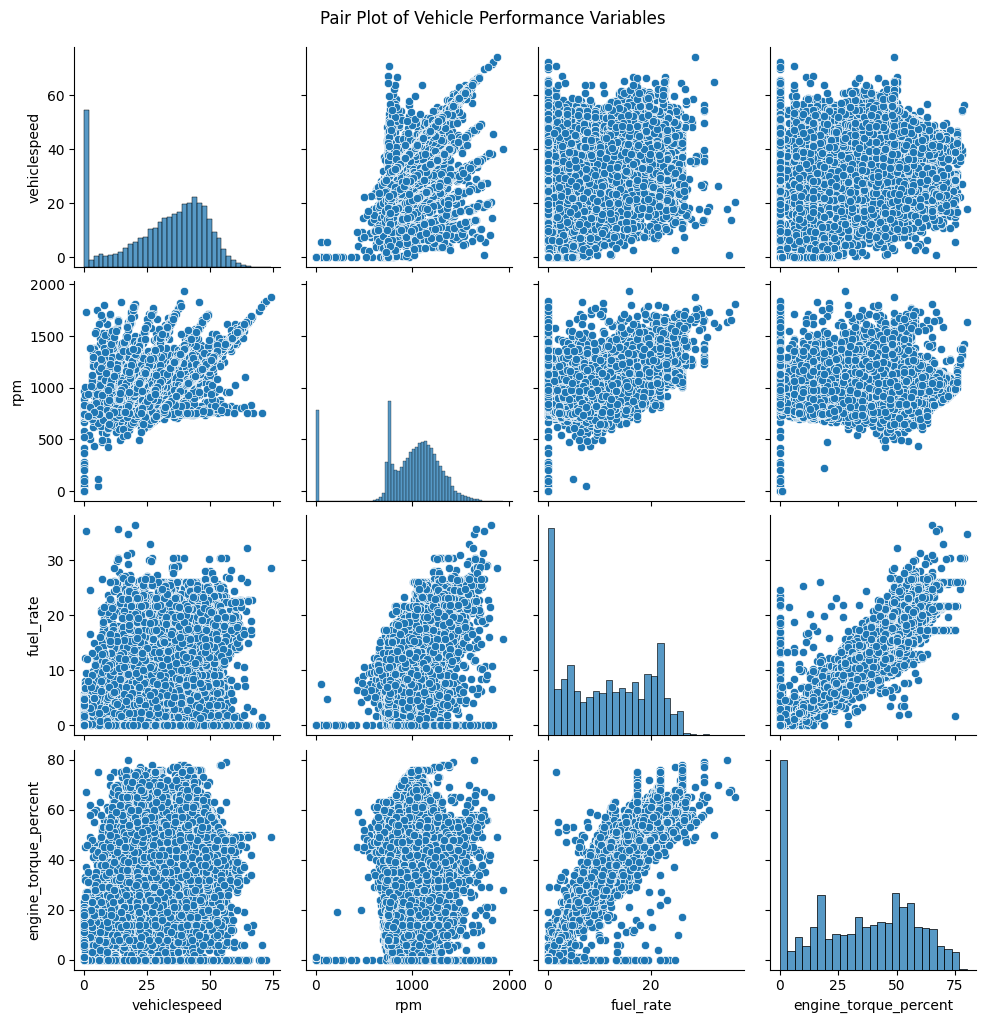

In [31]:
numerical_cols = ['vehiclespeed', 'rpm', 'fuel_rate', 'engine_torque_percent']

# Generate pair plot
sns.pairplot(df7[numerical_cols])
plt.suptitle('Pair Plot of Vehicle Performance Variables', y=1.02)
plt.show()

In [34]:
#converting datatype
mapping = {'Released': 1,'Pressed': 0,}
df7.iloc[:, -3:] = df7.iloc[:, -3:].replace(mapping)
df7

,engineload,coolant,vehiclespeed,rpm,engine_torque_percent,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,drivers_demand_engine_torque_percent,engine_torque_mode,brake_switch_status,clutch_switch_status,parking_switch_status
0,28,33,0.00000,749.000,21,0,17935.5,23.6,86.14,5.30,0.000000,0.0,0,1,1,1,0
6,0,53,0.00000,0.000,0,0,17936.0,23.2,84.68,0.00,125.500000,0.0,0,15,1,1,0
7,0,53,0.00000,0.000,0,0,17936.0,23.2,84.68,0.00,125.500000,0.0,0,15,1,0,0
8,0,53,0.00000,0.000,0,0,17936.0,23.2,84.68,0.00,125.500000,0.0,0,15,1,1,0
9,0,52,0.00000,0.000,0,0,17936.0,23.2,84.68,0.00,125.500000,0.0,0,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18428,0,92,28.37500,1361.250,0,13,21058.5,80.0,292.00,0.00,125.500000,0.0,0,2,1,0,1
18429,50,89,14.28125,945.125,33,11,21058.5,78.8,287.62,8.50,1.705078,46.4,34,2,1,0,1
18430,0,92,38.28125,1130.750,0,16,21058.5,80.8,294.92,0.00,125.500000,0.0,0,2,1,0,1
18432,52,87,17.71875,820.625,39,13,21059.0,79.2,289.08,9.30,1.929688,56.4,46,9,1,0,1


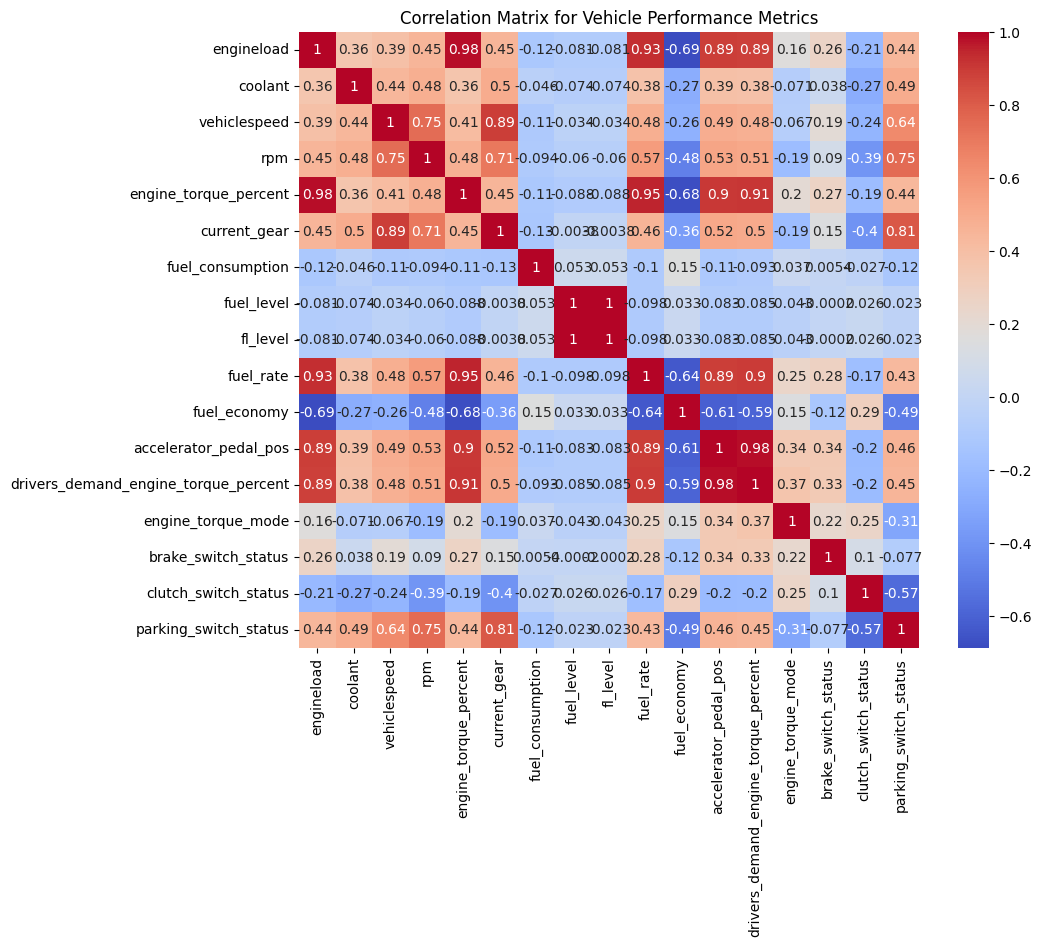

In [36]:
#heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df7.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Vehicle Performance Metrics')
plt.show()

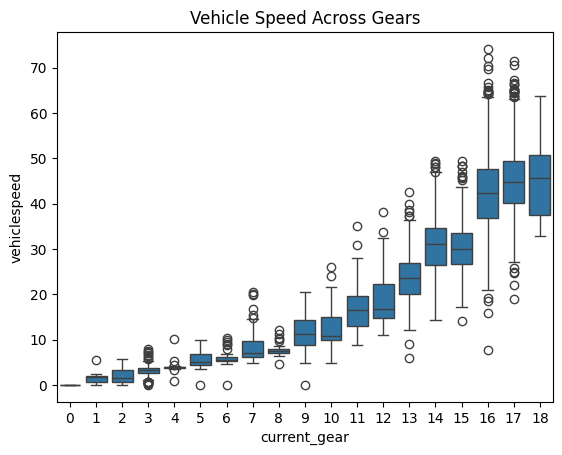

In [88]:
#boxplot speed vs gears
sns.boxplot(x='current_gear', y='vehiclespeed', data=df7)
plt.title('Vehicle Speed Across Gears')
plt.show()

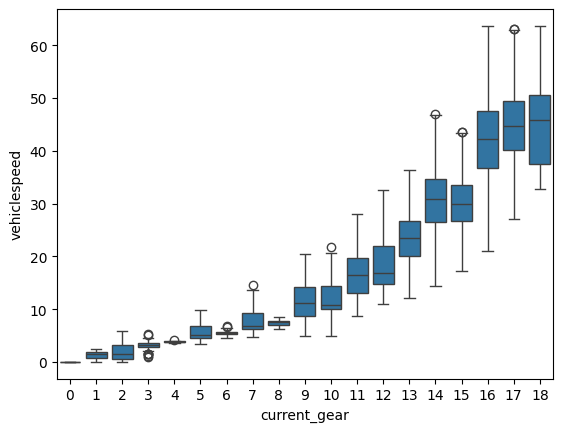

In [39]:
# Group by current gear and calculate Q1 and Q3 for each gear
Q1 = df7.groupby('current_gear')['vehiclespeed'].quantile(0.25)
Q3 = df7.groupby('current_gear')['vehiclespeed'].quantile(0.75)

IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Removing outliers for each gear
def remove_outliers(group):
    lower = Q1[group.name] - 1.5 * IQR[group.name]
    upper = Q3[group.name] + 1.5 * IQR[group.name]
    return group[(group['vehiclespeed'] >= lower) & (group['vehiclespeed'] <= upper)]

df8 = df7.groupby('current_gear').apply(remove_outliers).reset_index(drop=True)
sns.boxplot(x='current_gear', y='vehiclespeed', data=df8)
plt.show()

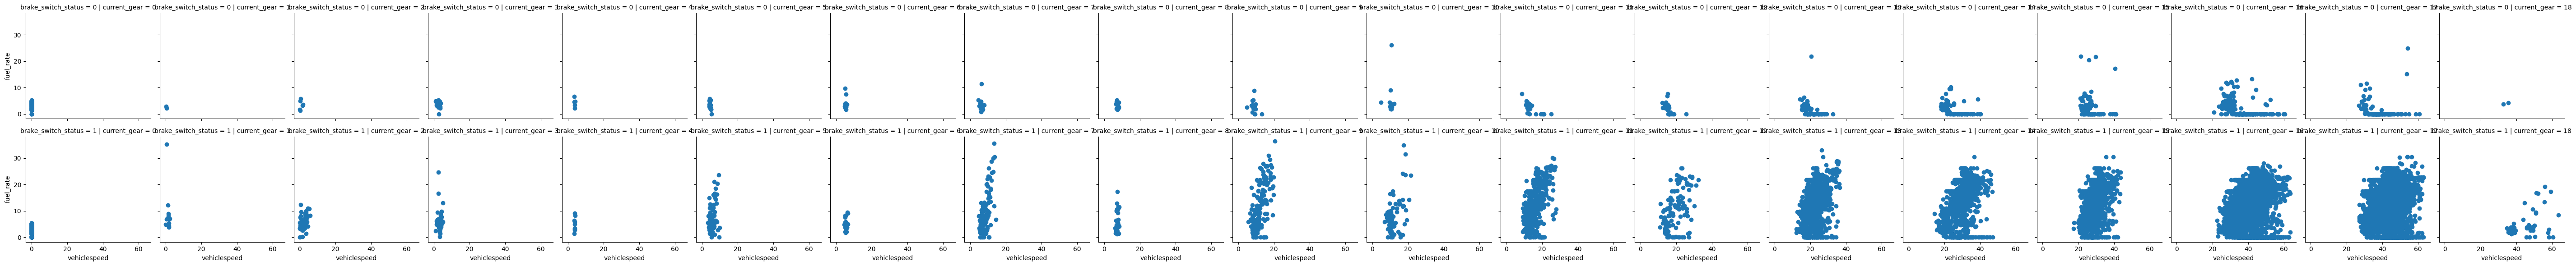

In [41]:
#Facegrit plot
g = sns.FacetGrid(df8, col='current_gear', row='brake_switch_status')
g.map(plt.scatter, 'vehiclespeed', 'fuel_rate')
plt.show()

In [42]:
#Crosstab for gear and brake relations
pd.crosstab(df8['current_gear'], df8['brake_switch_status'])

brake_switch_status,0,1
current_gear,,
0,256,1611
1,2,12
2,6,49
3,23,41
4,5,9
5,15,81
6,12,27
7,20,128
8,12,31


In [45]:
#Adding fuel efficiency feature
df8['fuel_efficiency'] = df8['vehiclespeed'] / df8['fuel_rate']
df8

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,engineload,coolant,vehiclespeed,rpm,engine_torque_percent,current_gear,fuel_consumption,fuel_level,fl_level,fuel_rate,fuel_economy,accelerator_pedal_pos,drivers_demand_engine_torque_percent,engine_torque_mode,brake_switch_status,clutch_switch_status,parking_switch_status,fuel_efficiency
0,28,33,0.000000,749.000,21,0,17935.5,23.6,86.14,5.30,0.000000,0.0,0,1,1,1,0,0.000000
1,0,53,0.000000,0.000,0,0,17936.0,23.2,84.68,0.00,125.500000,0.0,0,15,1,1,0,NaN
2,0,53,0.000000,0.000,0,0,17936.0,23.2,84.68,0.00,125.500000,0.0,0,15,1,0,0,NaN
3,0,53,0.000000,0.000,0,0,17936.0,23.2,84.68,0.00,125.500000,0.0,0,15,1,1,0,NaN
4,0,52,0.000000,0.000,0,0,17936.0,23.2,84.68,0.00,125.500000,0.0,0,15,1,1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14206,24,85,35.531250,746.625,16,18,20839.5,61.6,224.84,4.25,6.648438,0.0,0,1,0,0,1,8.360294
14207,21,83,32.828125,748.375,14,18,20976.0,26.4,96.36,3.80,8.810547,0.0,0,1,0,0,1,8.638980
14208,54,85,52.250000,1330.250,40,18,20987.5,99.2,362.08,16.65,3.162109,54.4,40,2,1,0,1,3.138138
14209,39,85,37.453125,768.000,7,18,20997.0,97.6,356.24,1.45,25.599610,65.6,0,1,1,0,1,25.829741


In [90]:
#Adding Fuel% in the vehicle tank
df8['fuel%'] = df8['fuel_level']*100 / df8['fl_level']

#Dropping the initial fuel level and Tank level columns
df9 = df8.drop(['fuel_level', 'fl_level'], axis=1)
df9


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,engineload,coolant,vehiclespeed,rpm,engine_torque_percent,current_gear,fuel_consumption,fuel_rate,fuel_economy,accelerator_pedal_pos,drivers_demand_engine_torque_percent,engine_torque_mode,brake_switch_status,clutch_switch_status,parking_switch_status,fuel_efficiency,fuel%
0,28,33,0.000000,749.000,21,0,17935.5,5.30,0.000000,0.0,0,1,1,1,0,0.000000,27.39726
1,0,53,0.000000,0.000,0,0,17936.0,0.00,125.500000,0.0,0,15,1,1,0,NaN,27.39726
2,0,53,0.000000,0.000,0,0,17936.0,0.00,125.500000,0.0,0,15,1,0,0,NaN,27.39726
3,0,53,0.000000,0.000,0,0,17936.0,0.00,125.500000,0.0,0,15,1,1,0,NaN,27.39726
4,0,52,0.000000,0.000,0,0,17936.0,0.00,125.500000,0.0,0,15,1,1,0,NaN,27.39726
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14206,24,85,35.531250,746.625,16,18,20839.5,4.25,6.648438,0.0,0,1,0,0,1,8.360294,27.39726
14207,21,83,32.828125,748.375,14,18,20976.0,3.80,8.810547,0.0,0,1,0,0,1,8.638980,27.39726
14208,54,85,52.250000,1330.250,40,18,20987.5,16.65,3.162109,54.4,40,2,1,0,1,3.138138,27.39726
14209,39,85,37.453125,768.000,7,18,20997.0,1.45,25.599610,65.6,0,1,1,0,1,25.829741,27.39726


In [91]:
# Defining the conditions for refueling alert based on fuel%, fuel economy, fuel consumption, and RPM
def refuel_needed(row):
    if row['fuel%'] < 20:  # Low fuel percentage
        return 1
    elif row['fuel_economy'] < 10:  # Low fuel economy
        return 1
    elif row['fuel_consumption'] > 15 and row['rpm'] > 2000:  # High consumption with high RPM
        return 1
    else:
        return 0

# Apply the function to the dataset
df9['refuel_alert'] = df9.apply(refuel_needed, axis=1)
df9


/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,engineload,coolant,vehiclespeed,rpm,engine_torque_percent,current_gear,fuel_consumption,fuel_rate,fuel_economy,accelerator_pedal_pos,drivers_demand_engine_torque_percent,engine_torque_mode,brake_switch_status,clutch_switch_status,parking_switch_status,fuel_efficiency,fuel%,refuel_alert
0,28,33,0.000000,749.000,21,0,17935.5,5.30,0.000000,0.0,0,1,1,1,0,0.000000,27.39726,1
1,0,53,0.000000,0.000,0,0,17936.0,0.00,125.500000,0.0,0,15,1,1,0,NaN,27.39726,0
2,0,53,0.000000,0.000,0,0,17936.0,0.00,125.500000,0.0,0,15,1,0,0,NaN,27.39726,0
3,0,53,0.000000,0.000,0,0,17936.0,0.00,125.500000,0.0,0,15,1,1,0,NaN,27.39726,0
4,0,52,0.000000,0.000,0,0,17936.0,0.00,125.500000,0.0,0,15,1,1,0,NaN,27.39726,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14206,24,85,35.531250,746.625,16,18,20839.5,4.25,6.648438,0.0,0,1,0,0,1,8.360294,27.39726,1
14207,21,83,32.828125,748.375,14,18,20976.0,3.80,8.810547,0.0,0,1,0,0,1,8.638980,27.39726,1
14208,54,85,52.250000,1330.250,40,18,20987.5,16.65,3.162109,54.4,40,2,1,0,1,3.138138,27.39726,1
14209,39,85,37.453125,768.000,7,18,20997.0,1.45,25.599610,65.6,0,1,1,0,1,25.829741,27.39726,0


In [92]:
# combine both speed and rpm
df9['speed_rpm_interaction'] = df9['vehiclespeed'] * df9['rpm']
df9

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,engineload,coolant,vehiclespeed,rpm,engine_torque_percent,current_gear,fuel_consumption,fuel_rate,fuel_economy,accelerator_pedal_pos,drivers_demand_engine_torque_percent,engine_torque_mode,brake_switch_status,clutch_switch_status,parking_switch_status,fuel_efficiency,fuel%,refuel_alert,speed_rpm_interaction
0,28,33,0.000000,749.000,21,0,17935.5,5.30,0.000000,0.0,0,1,1,1,0,0.000000,27.39726,1,0.000000
1,0,53,0.000000,0.000,0,0,17936.0,0.00,125.500000,0.0,0,15,1,1,0,NaN,27.39726,0,0.000000
2,0,53,0.000000,0.000,0,0,17936.0,0.00,125.500000,0.0,0,15,1,0,0,NaN,27.39726,0,0.000000
3,0,53,0.000000,0.000,0,0,17936.0,0.00,125.500000,0.0,0,15,1,1,0,NaN,27.39726,0,0.000000
4,0,52,0.000000,0.000,0,0,17936.0,0.00,125.500000,0.0,0,15,1,1,0,NaN,27.39726,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14206,24,85,35.531250,746.625,16,18,20839.5,4.25,6.648438,0.0,0,1,0,0,1,8.360294,27.39726,1,26528.519531
14207,21,83,32.828125,748.375,14,18,20976.0,3.80,8.810547,0.0,0,1,0,0,1,8.638980,27.39726,1,24567.748047
14208,54,85,52.250000,1330.250,40,18,20987.5,16.65,3.162109,54.4,40,2,1,0,1,3.138138,27.39726,1,69505.562500
14209,39,85,37.453125,768.000,7,18,20997.0,1.45,25.599610,65.6,0,1,1,0,1,25.829741,27.39726,0,28764.000000


In [62]:
# Select the remaining features and target variable
X = df9[['engineload', 'engine_torque_percent', 'fuel_rate', 'drivers_demand_engine_torque_percent',
        'current_gear', 'coolant','fuel_consumption', 'speed_rpm_interaction', 'brake_switch_status','fuel%']]
y = df9['fuel_economy']  # The actual target variable

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared: {r2}")


Mean Squared Error: 0.743721886006361
R-Squared: 0.9996558892449587


In [95]:
#model tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_


In [63]:
#Highliting importantance of each feature to target variable
importances = model.feature_importances_
features = X.columns

feature_importance_df15 = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df15.sort_values(by='Importance', ascending=False, inplace=True)

print(feature_importance_df15)


                                Feature  Importance
2                             fuel_rate    0.994839
7                 speed_rpm_interaction    0.001780
4                          current_gear    0.001529
0                            engineload    0.001272
1                 engine_torque_percent    0.000416
6                      fuel_consumption    0.000069
5                               coolant    0.000048
3  drivers_demand_engine_torque_percent    0.000035
8                   brake_switch_status    0.000011
9                                 fuel%    0.000000


<Axes: xlabel='fuel_economy', ylabel='fuel_rate'>

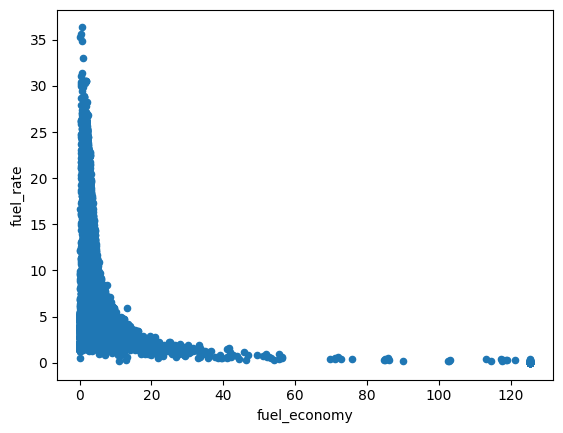

In [64]:
#scatter plot fuel economy vs fuel rate
df9.plot.scatter(x='fuel_economy', y='fuel_rate')

<Axes: xlabel='fuel_economy', ylabel='speed_rpm_interaction'>

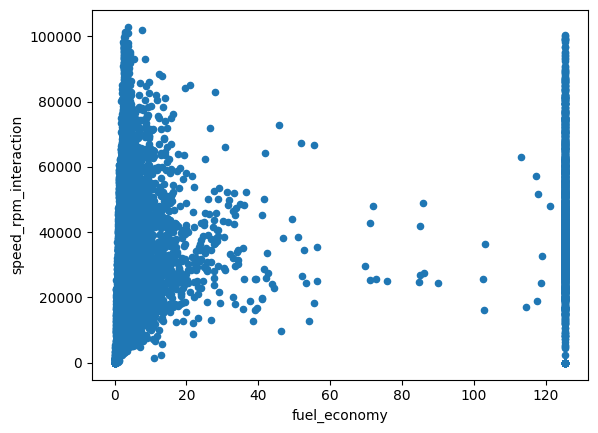

In [70]:
# scatter plot for fuel economy vs speed&rpm
df9.plot.scatter(x='fuel_economy', y='speed_rpm_interaction')

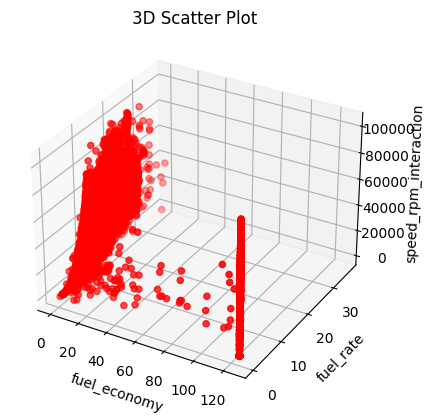

In [71]:
# Create the figure and axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the data
ax.scatter(df9['fuel_economy'], df9['fuel_rate'], df9['speed_rpm_interaction'], c='r', marker='o')


# Add labels and a title
ax.set_xlabel('fuel_economy')
ax.set_ylabel('fuel_rate')
ax.set_zlabel('speed_rpm_interaction')
ax.set_title('3D Scatter Plot')

# Show the plot
plt.show()